<a href="https://colab.research.google.com/github/RodrigoSouzaVieira/DemoCCTB/blob/main/MidTermExam_RodrigoVieira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
missing_values = titanic.isnull().mean() * 100
print("Percentage of Missing Values:")
print(missing_values)

Percentage of Missing Values:
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [7]:
titanic.fillna({'age':titanic['age'].median()}, inplace=True)
titanic.fillna({'embarked':titanic['embarked'].mode()[0]}, inplace=True)
titanic.dropna(subset=['survived'], inplace=True)

In [8]:
print("\nNumerical Summary:")
print(titanic.describe())


Numerical Summary:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [9]:
print("\nCategorical Summary:")
print(titanic.describe(include=['object', 'category']))


Categorical Summary:
         sex embarked  class  who deck  embark_town alive
count    891      891    891  891  203          889   891
unique     2        3      3    3    7            3     2
top     male        S  Third  man    C  Southampton    no
freq     577      646    491  537   59          644   549


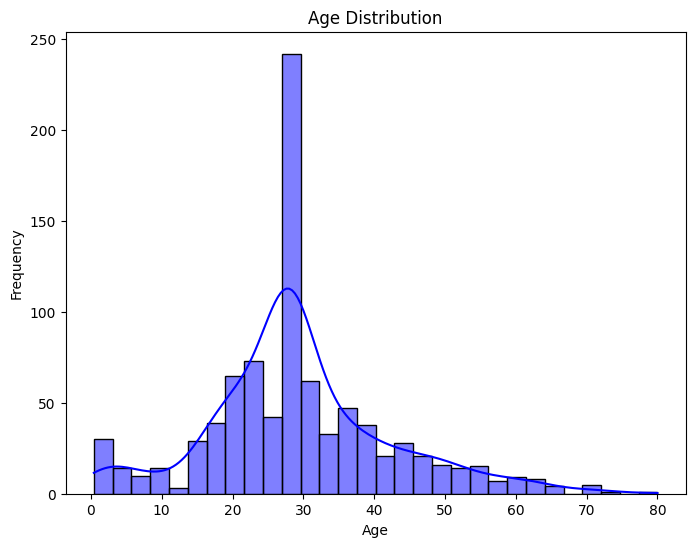

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic['age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

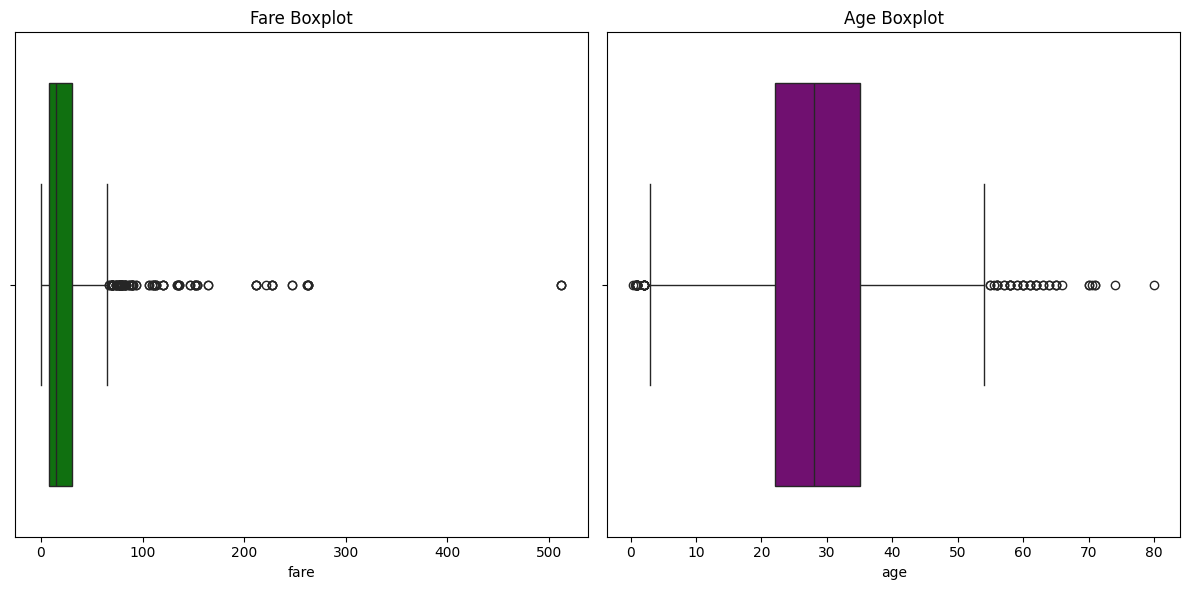

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=titanic['fare'], color='green')
plt.title('Fare Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(x=titanic['age'], color='purple')
plt.title('Age Boxplot')
plt.tight_layout()
plt.show()

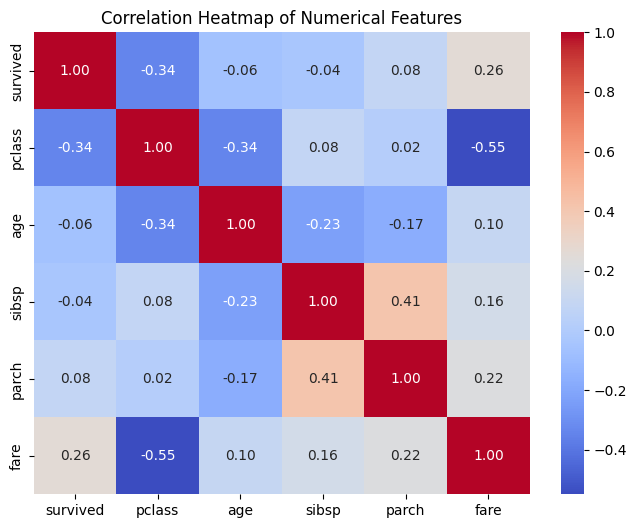

In [18]:
numerical_data = titanic.select_dtypes(include=['float64', 'int64'])
numerical_corr = numerical_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [19]:
average_fare_class = titanic.groupby('pclass')['fare'].mean()
print("\nAverage Fare for Each Class:")
print(average_fare_class)


Average Fare for Each Class:
pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


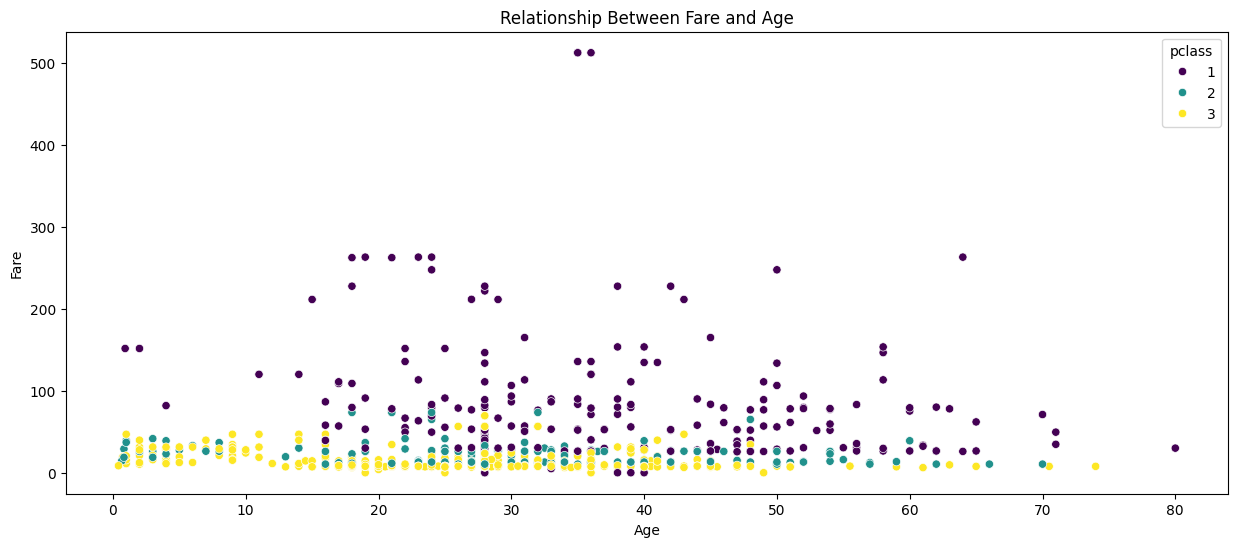

In [23]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='pclass', palette='viridis')
plt.title('Relationship Between Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()